#Import necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizing dataset

In [ ]:
df=pd.read_csv('Live.csv')

In [ ]:
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.shape


(7050, 16)

In [ ]:
df.describe


<bound method NDFrame.describe of                               status_id status_type status_published  \
0      246675545449582_1649696485147474       video   4/22/2018 6:00   
1      246675545449582_1649426988507757       photo  4/21/2018 22:45   
2      246675545449582_1648730588577397       video   4/21/2018 6:17   
3      246675545449582_1648576705259452       photo   4/21/2018 2:29   
4      246675545449582_1645700502213739       photo   4/18/2018 3:22   
...                                 ...         ...              ...   
7045  1050855161656896_1061863470556065       photo   9/24/2016 2:58   
7046  1050855161656896_1061334757275603       photo  9/23/2016 11:19   
7047  1050855161656896_1060126464063099       photo  9/21/2016 23:03   
7048  1050855161656896_1058663487542730       photo   9/20/2016 0:43   
7049  1050855161656896_1050858841656528       photo  9/10/2016 10:30   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529 

In [ ]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

#Removing unnecessary columns (Data cleaning)

In [ ]:
df.pop('status_id')
df.pop('status_published')
df.pop('Column1')
df.pop('Column2')
df.pop('Column3')
df.pop('Column4')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7045   NaN
7046   NaN
7047   NaN
7048   NaN
7049   NaN
Name: Column4, Length: 7050, dtype: float64

In [ ]:
df #dataset after popping


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [ ]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [ ]:
df['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

#Checking null values

In [ ]:
df.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

#Splitting dataset into labels and features

In [ ]:
x=df.iloc[:,1:] #features
y=df.iloc[:,0] #labels

In [ ]:
x


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1195,1931,26,0,1931,0,0,0,0,0
6401,8,0,0,8,0,0,0,0,0
3491,20,0,3,20,0,0,0,0,0
4723,21,4,0,21,0,0,0,0,0
4720,93,30,0,92,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4304,128,164,79,109,18,1,0,0,0
4305,2,0,0,2,0,0,0,0,0
4306,3,0,0,3,0,0,0,0,0
4308,54,90,281,47,7,0,0,0,0


In [ ]:
y

1195     link
6401     link
3491     link
4723     link
4720     link
        ...  
4304    video
4305    video
4306    video
4308    video
3524    video
Name: status_type, Length: 7050, dtype: object

#Data visualization

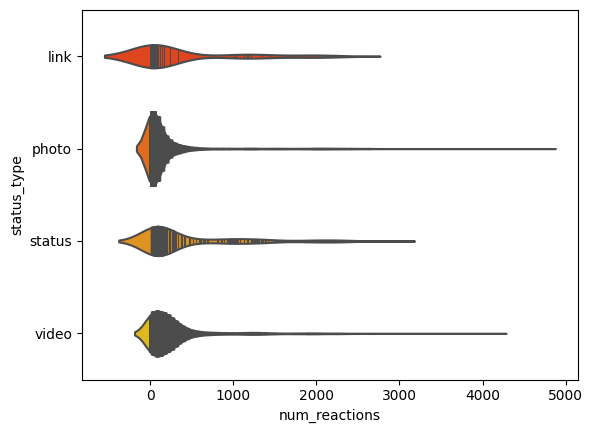

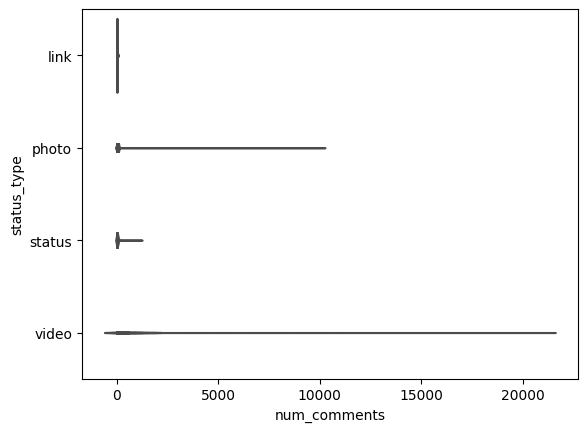

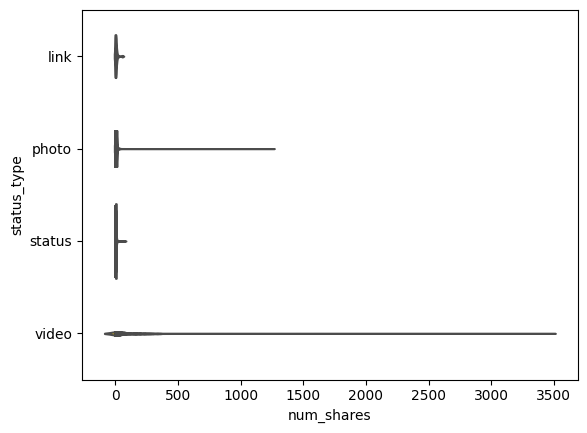

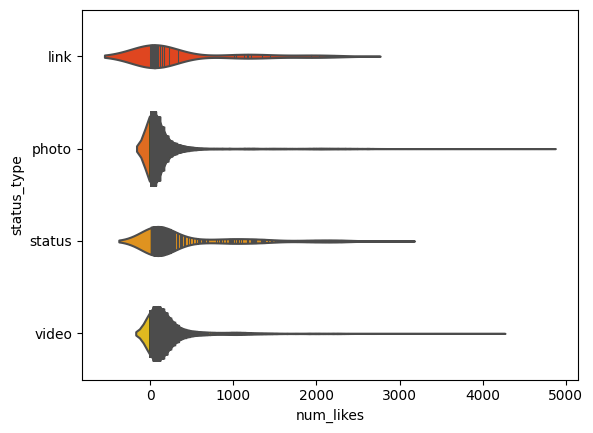

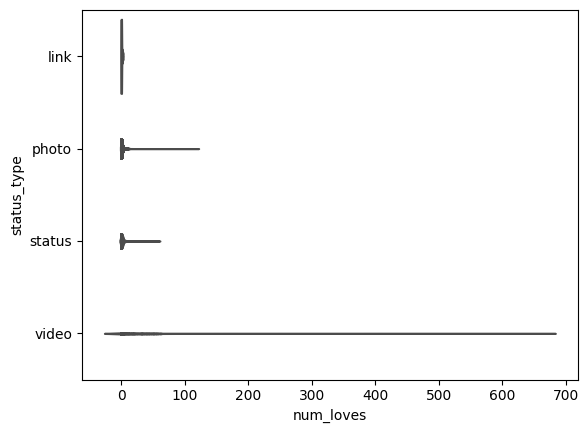

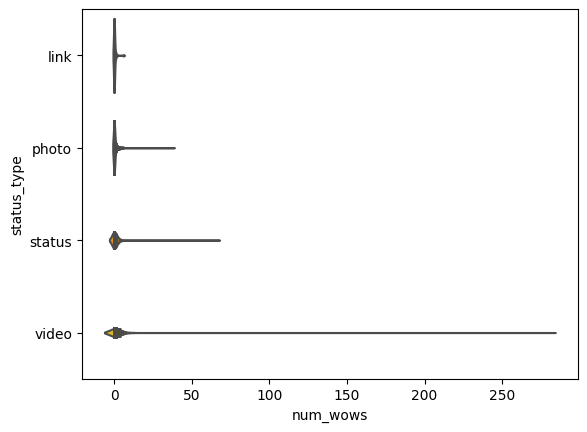

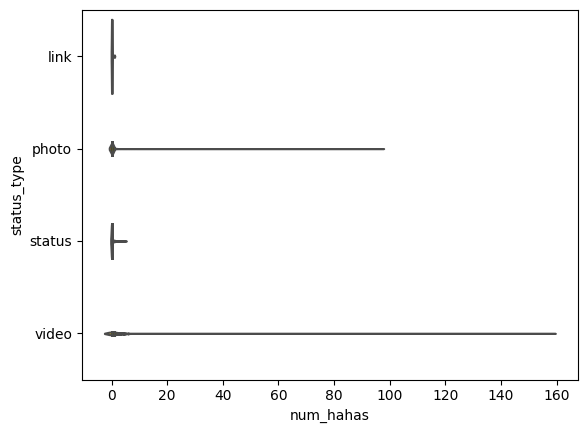

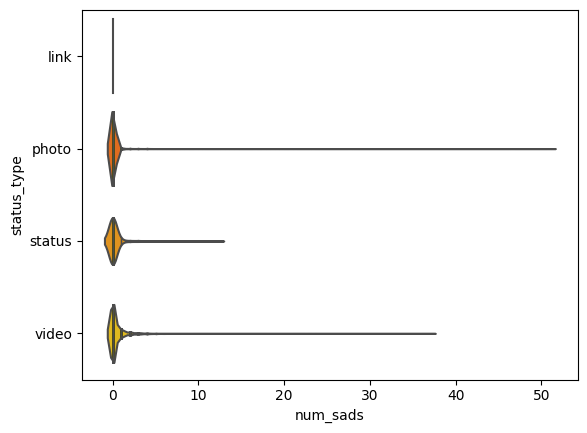

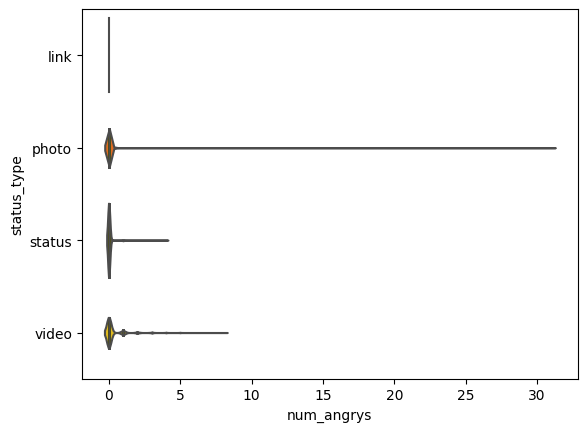

In [ ]:
sns.violinplot(x='num_reactions', y='status_type', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='num_comments', y='status_type', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='num_shares', y='status_type', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='num_likes', y='status_type', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='num_loves', y='status_type', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='num_wows', y='status_type', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='num_hahas', y='status_type', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='num_sads', y='status_type', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='num_angrys', y='status_type', data=df, inner='stick', palette='autumn')
plt.show()

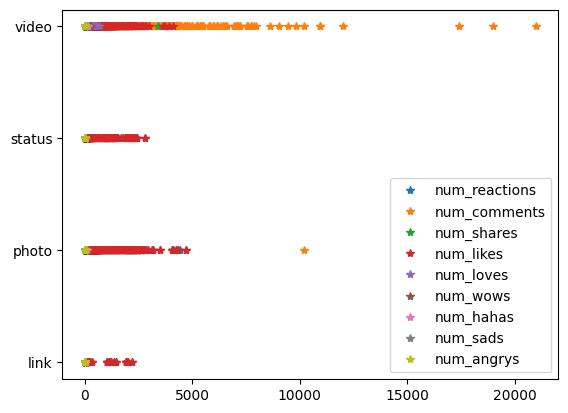

In [ ]:
%matplotlib inline
plt.plot(x,y,'*')
plt.legend(x)

#Splitting dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(5640, 9)

In [ ]:
y_train.shape

(5640,)

In [ ]:
x_test.shape

(1410, 9)

In [ ]:
y_test.shape

(1410,)

#Applying logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train) #fitting the model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test) #making predictions for testing data

In [ ]:
y_pred


array(['photo', 'photo', 'video', ..., 'photo', 'photo', 'photo'],
      dtype=object)

#Plotting predictions against features testing data

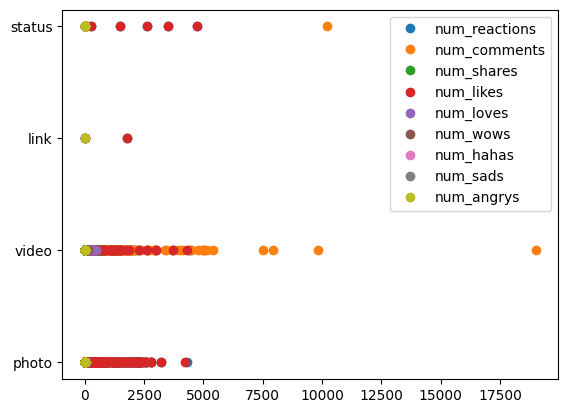

In [ ]:
plt.plot(x_test,y_pred,'o')
plt.legend(x_test)

#Plotting labels of test data against features of testing data

In [ ]:
y_test #labels of test data

1004    status
897     status
3895     video
6725     photo
4160     video
         ...  
5699     video
1811     photo
2066     photo
1226     photo
683     status
Name: status_type, Length: 1410, dtype: object

In [ ]:
y_test.value_counts()

photo     851
video     471
status     68
link       20
Name: status_type, dtype: int64

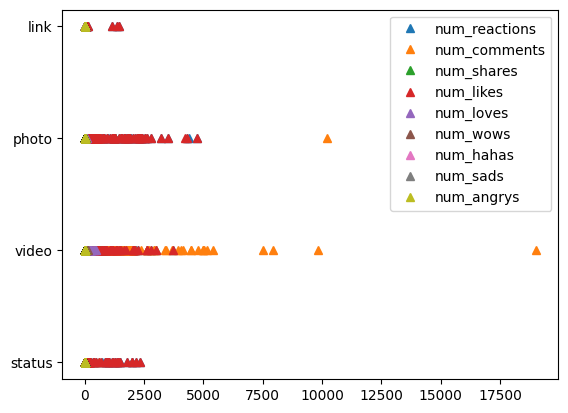

In [ ]:
plt.plot(x_test,y_test,'^')
plt.legend(x_test)

#Calculating accuracy score and confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  0,  20,   0,   0],
       [  0, 828,   4,  19],
       [  1,  62,   1,   4],
       [  0, 248,   0, 223]])

In [ ]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 74.61


#Visualizing confusion matrix as heatmap

<Axes: >

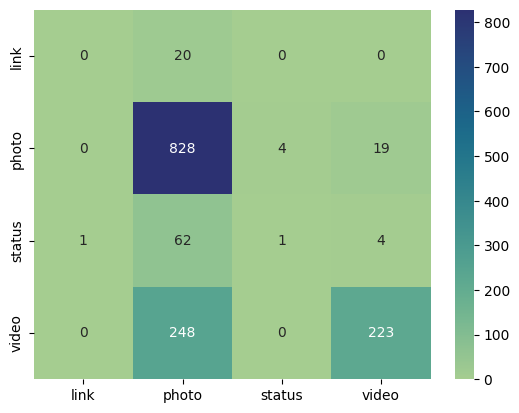

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='crest',fmt='g',xticklabels=['link','photo','status','video'],yticklabels=['link','photo','status','video'])